# Regresión lineal

Abordemos las primeras ideas de regresión lineal a través de un ejemplo práctico:

-  Creamos dos variables, Ingreso y Consumo Esperado

In [213]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import random
import statsmodels.formula.api as stm
from statsmodels.graphics.regressionplots import abline_plot


df = pd.DataFrame({
    'Col1': [1,2,3],
    'Col2': [4,5,6]
    })


familia = pd.DataFrame({'Y':[55,60,65,70,75,
                        65,70,74,80,85,88,
                        79,84,90,94,98,
                        80,93,95,103,108,113,115,
                        102,107,110,116,118,125,
                        110,115,120,130,135,140,
                        120,136,140,144,145,
                        135,137,140,152,157,160,162,
                        137,145,155,165,175,189,
                        150,152,175,178,180,185,191
                        ],'X':[80,80,80,80,80,
                   100,100,100,100,100,100,
                   120,120,120,120,120,
                   140,140,140,140,140,140,140,
                   160,160,160,160,160,160,
                   180,180,180,180,180,180,
                   200,200,200,200,200,
                   220,220,220,220,220,220,220,
                   240,240,240,240,240,240,
                   260,260,260,260,260,260,260
                   ]})
familia.head()

Y   X
0  55  80
1  60  80
2  65  80
3  70  80
4  75  80

In [214]:
ingresos = np.arange(80,261,20)
ingresos
consumoEsperado = [65,77,89,101,113,125,137,149,161,173]
consumoEsperado


familia.columns

Index(['Y', 'X'], dtype='object')

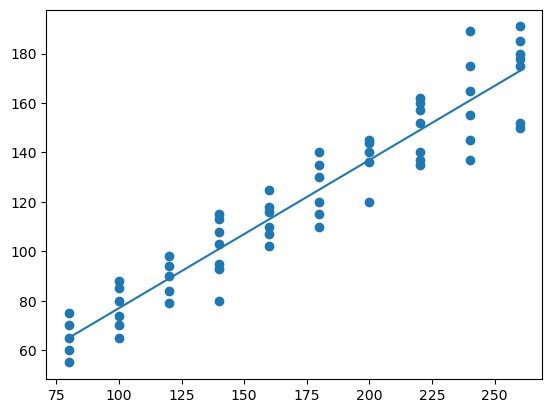

In [215]:
plt.figure() # llama al dispositivo grafico
plt.plot(ingresos,consumoEsperado)
plt.scatter(familia['X'],familia['Y'])
plt.show()

¿Qué hemos hecho?

$$ E(Y|X_i) = f(X_i)$$

$$E(Y|X_i) = \beta_1+\beta_2X_i$$

$$ u_i = Y_i - E(Y|X_i) $$

$$ Y_i = E(Y|X_i) + u_i$$


¿Qué significa que sea lineal?

El término regresión lineal siempre significará una regresión lineal en los parámetros; los $\beta$ (es decir, los parámetros) se elevan sólo a la primera potencia. Puede o no ser lineal en las variables explicativas $X$.

Para evidenciar la factibilidad del uso de RL en este caso, vamos a obtener una muestra de la población:

In [216]:
nS = familia.shape
type(nS)
indice = np.arange(0,nS[0])
indice # Creamos una variable indicadora para obtener una muestra

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
       34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50,
       51, 52, 53, 54, 55, 56, 57, 58, 59])

In [217]:
random.seed(8519)
muestra = random.sample(list(indice),k = 20) # cambio de array a lista
muestra # samos sample para obtener una muestra sin reemplazo del tamaño indicado

[54, 59, 33, 25, 32, 39, 47, 51, 18, 3, 34, 12, 29, 7, 26, 5, 56, 50, 44, 13]

In [218]:
ingreso_muestra = familia.loc[muestra,'X']
consumo_muestra = familia.loc[muestra,'Y']

In [219]:
df = pd.DataFrame(list(zip(consumo_muestra,ingreso_muestra)),columns = ['consumo_muestra','ingreso_muestra'])
ajuste_1 = stm.ols('consumo_muestra~ingreso_muestra',data =df).fit()

print(ajuste_1.summary())

                            OLS Regression Results                            
Dep. Variable:        consumo_muestra   R-squared:                       0.909
Model:                            OLS   Adj. R-squared:                  0.904
Method:                 Least Squares   F-statistic:                     179.4
Date:                Wed, 13 Dec 2023   Prob (F-statistic):           8.44e-11
Time:                        00:39:35   Log-Likelihood:                -76.677
No. Observations:                  20   AIC:                             157.4
Df Residuals:                      18   BIC:                             159.3
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
Intercept          13.2650      8.817     

Text(0, 0.5, 'Cellphone')

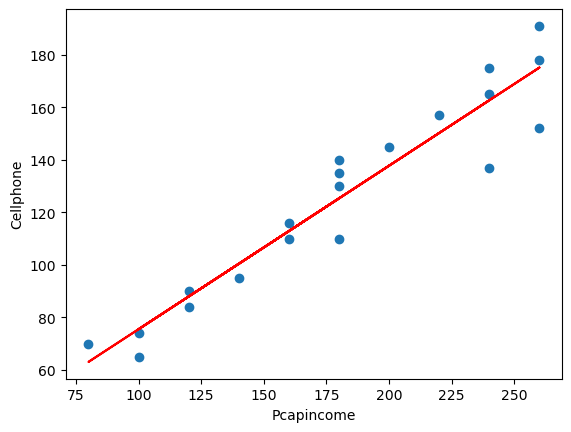

In [220]:
plt.figure()
plt.plot(df.ingreso_muestra,df.consumo_muestra,'o')
plt.plot(df.ingreso_muestra,ajuste_1.fittedvalues,'-',color='r')
plt.xlabel('Pcapincome')
plt.ylabel('Cellphone')


## Regresión: Paso a paso

La función poblacional sería:

$$
Y_i = \beta_1 + \beta_2X_i+u_i
$$

Como no es observable, se usa la muestral

$$
Y_i=\hat{\beta}_1+\hat{\beta}_2X_i+\hat{u}_i
$$


$$
Y_i=\hat{Y}_i+\hat{u}_i
$$


$$
\hat{u}_i = Y_i-\hat{Y}_i
$$


$$
\hat{u}_i = Y_i- \hat{\beta}_1-\hat{\beta}_2X_i
$$


Es por esto que los residuos se obtienen a través de los betas:


$$
\sum\hat{u}_i^2 =\sum (Y_i- \hat{\beta}_1-\hat{\beta}_2X_i)^2
$$


$$
\sum\hat{u}_i^2 =f(\hat{\beta}_1,\hat{\beta}_2)
$$


Diferenciando se obtiene:

$$
 \hat{\beta}_2 = \frac{S_{xy}}{S_{xx}}
$$

$$
 \hat\beta_1 = \bar{Y} -  \hat\beta_2\bar{X}
$$
donde 

$$
S_{xx} = \sum_{i=1}^{n}x_i^2-n\bar{x}^2
$$

$$
S_{xy} = \sum_{i=1}^{n}x_i y_i-n\bar{x}\bar{y}
$$


Abrimos la `tabla3.2`, vamos a obtener:

-  salario promedio por hora (Y) y 
-  los años de escolaridad (X).


In [221]:
consumo = pd.read_csv('https://raw.githubusercontent.com/vmoprojs/DataLectures/master/GA/Tabla3_2.csv',
                      sep = ';',decimal = '.')


consumo.head()

Y    X
0   70   80
1   65  100
2   90  120
3   95  140
4  110  160

In [222]:
media_x = np.mean(consumo['X'])
media_y = np.mean(consumo['Y'])


n = consumo.shape[0]

sumcuad_x = np.sum(consumo['X']*consumo['X'])
sum_xy = np.sum(consumo['X']*consumo['Y'])

beta_som = (sum_xy-n*media_x*media_y)/(sumcuad_x-n*(media_x**2))
alpha_som = media_y-beta_som*media_x
(alpha_som,beta_som)

(24.454545454545467, 0.509090909090909)

Verificamos lo anterior mediante:

In [223]:
reg_1 = stm.ols('Y~X',data = consumo)
print(reg_1.fit().summary())

                            OLS Regression Results                            
Dep. Variable:                      Y   R-squared:                       0.962
Model:                            OLS   Adj. R-squared:                  0.957
Method:                 Least Squares   F-statistic:                     202.9
Date:                Wed, 13 Dec 2023   Prob (F-statistic):           5.75e-07
Time:                        00:39:36   Log-Likelihood:                -31.781
No. Observations:                  10   AIC:                             67.56
Df Residuals:                       8   BIC:                             68.17
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     24.4545      6.414      3.813      0.0

/Users/victormorales/opt/anaconda3/lib/python3.9/site-packages/scipy/stats/_stats_py.py:1736: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=10
  warnings.warn("kurtosistest only valid for n>=20 ... continuing "


Veamos cómo queda nuestra estimación:

In [224]:
y_ajustado = alpha_som+beta_som*consumo['X']

dfAux = pd.DataFrame(list(zip(consumo['X'],y_ajustado)),
                     columns = ['X','y_ajustado'])
dfAux

X  y_ajustado
0   80   65.181818
1  100   75.363636
2  120   85.545455
3  140   95.727273
4  160  105.909091
5  180  116.090909
6  200  126.272727
7  220  136.454545
8  240  146.636364
9  260  156.818182

In [225]:
e = consumo['Y']-y_ajustado


dfAux = pd.DataFrame(list(zip(consumo['X'],consumo['Y'],y_ajustado,e)),
                     columns = ['X','Y','y_ajustado','e'])

dfAux

X    Y  y_ajustado          e
0   80   70   65.181818   4.818182
1  100   65   75.363636 -10.363636
2  120   90   85.545455   4.454545
3  140   95   95.727273  -0.727273
4  160  110  105.909091   4.090909
5  180  115  116.090909  -1.090909
6  200  120  126.272727  -6.272727
7  220  140  136.454545   3.545455
8  240  155  146.636364   8.363636
9  260  150  156.818182  -6.818182

In [226]:
np.mean(e)
np.corrcoef(e,consumo['X'])

array([[1.00000000e+00, 1.13838806e-15],
       [1.13838806e-15, 1.00000000e+00]])

In [227]:
SCT = np.sum((consumo['Y']-media_y)**2)
SCE = np.sum((y_ajustado-media_y)**2)
SCR = np.sum(e**2)

R_2 = SCE/SCT
R_2


0.9620615604867568

In [228]:
print(reg_1.fit().summary())

                            OLS Regression Results                            
Dep. Variable:                      Y   R-squared:                       0.962
Model:                            OLS   Adj. R-squared:                  0.957
Method:                 Least Squares   F-statistic:                     202.9
Date:                Wed, 13 Dec 2023   Prob (F-statistic):           5.75e-07
Time:                        00:39:36   Log-Likelihood:                -31.781
No. Observations:                  10   AIC:                             67.56
Df Residuals:                       8   BIC:                             68.17
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     24.4545      6.414      3.813      0.0

/Users/victormorales/opt/anaconda3/lib/python3.9/site-packages/scipy/stats/_stats_py.py:1736: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=10
  warnings.warn("kurtosistest only valid for n>=20 ... continuing "


**[Ejemplo 2.3] Salario del CEO y retorno sobre el capital**

$y$: Salario anual en miles de dólares

$x$: Retorno sobre el capital (ROE) promedio de la firma en los últimos 3 años.

$$
salary = \beta_0+\beta_1roe+u
$$

In [229]:
uu = "https://raw.githubusercontent.com/vmoprojs/DataLectures/master/WO/ceosal1.csv"
datos = pd.read_csv(uu)
datos.columns = ["salary","pcsalary" ,"sales", "roe","pcroe","ros","indus","finance", 
                "consprod" ,"utility" , "lsalary" , "lsales"  ]

In [230]:
reg_ceosal1 = stm.ols('salary~roe',data = datos)
print(reg_ceosal1.fit().summary())

                            OLS Regression Results                            
Dep. Variable:                 salary   R-squared:                       0.013
Model:                            OLS   Adj. R-squared:                  0.008
Method:                 Least Squares   F-statistic:                     2.767
Date:                Wed, 13 Dec 2023   Prob (F-statistic):             0.0978
Time:                        00:39:37   Log-Likelihood:                -1804.5
No. Observations:                 209   AIC:                             3613.
Df Residuals:                     207   BIC:                             3620.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    963.1913    213.240      4.517      0.0

1. Si $roe=0$, el salario predicho es igual al intercepto, USD $963.191,00$.
2. Si el $roe$ aumenta un punto porcentual, $\Delta roe=1$, entonces el salario cambia USD $18.500,00$
3. Como la ecuación es lineal, este resultado no depende del salario inicial.


**[Ejemplo 2.4] Salario y Educación**

$y$: Salario, medido en dólares por hora.

$x$: años de educación.

$$
wage = \beta_0+\beta_1 educ+u
$$

In [231]:
uu = "https://raw.githubusercontent.com/vmoprojs/DataLectures/master/WO/wage1.csv"
datos = pd.read_csv(uu)
datos.columns = ["wage"  ,   "educ"   ,  "exper"  ,  "tenure"  , "nonwhite", "female"  , "married" , "numdep",
                "smsa"  ,   "northcen" ,"south" ,   "west" ,    "construc" ,"ndurman" , "trcommpu" ,"trade",
                "services" ,"profserv", "profocc" , "clerocc" , "servocc"  ,"lwage" ,   "expersq" , "tenursq" ]

In [232]:
reg_sal = stm.ols("wage~educ",data = datos)

In [233]:
print(reg_sal.fit().summary())

                            OLS Regression Results                            
Dep. Variable:                   wage   R-squared:                       0.164
Model:                            OLS   Adj. R-squared:                  0.163
Method:                 Least Squares   F-statistic:                     102.9
Date:                Wed, 13 Dec 2023   Prob (F-statistic):           3.44e-22
Time:                        00:39:38   Log-Likelihood:                -1383.4
No. Observations:                 525   AIC:                             2771.
Df Residuals:                     523   BIC:                             2779.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -0.8916      0.686     -1.300      0.1

En promedio, un año más de educación genera un aumento de 0.5406 dólares más en el salsario por ahora.

**[Ejemplo 2.5] Resultados de la votación y gastos de campaña**

$y$: $voteA$, es el porcentaje de voto recibido por el candidato A.

$x$: $shareA$ es el porcentaje del total de campaña gastado por el candidato A.

$$
voteA = \beta_0+\beta_1 shareA
$$

In [234]:
uu = "https://raw.githubusercontent.com/vmoprojs/DataLectures/master/WO/vote1.csv"
datos = pd.read_csv(uu)
datos.columns = ["state"    ,"district", "democA",   "voteA" ,   "expendA" , "expendB",  "prtystrA" ,"lexpendA",
                "lexpendB" ,"shareA"  ]

In [235]:
reg_vote = stm.ols("voteA~shareA",data = datos)
print(reg_vote.fit().summary())

                            OLS Regression Results                            
Dep. Variable:                  voteA   R-squared:                       0.856
Model:                            OLS   Adj. R-squared:                  0.855
Method:                 Least Squares   F-statistic:                     1018.
Date:                Wed, 13 Dec 2023   Prob (F-statistic):           6.63e-74
Time:                        00:39:38   Log-Likelihood:                -565.20
No. Observations:                 173   AIC:                             1134.
Df Residuals:                     171   BIC:                             1141.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     26.8122      0.887     30.221      0.0

Esto significa que si la proporción del gasto del candidato A aumenta en un punto porcentual, el candidato $A$ recibe casi medio punto porcentual ($0,464$) más del voto total.

En algunos casos, el análisis de regresión no se utiliza para determinar la causalidad, sino simplemente para observar si dos variables están relacionadas positiva o negativamente, de forma muy similar a un análisis de correlación estándar.

### Incorporando no linealidades en la regresión simple

$$
wage = exp(\beta_0+\beta_1educ)
$$

$$
log(wage) = \beta_0+\beta_1educ
$$

In [236]:
uu = "https://raw.githubusercontent.com/vmoprojs/DataLectures/master/WO/wage1.csv"
datos = pd.read_csv(uu)
datos.columns = ["wage"  ,   "educ"   ,  "exper"  ,  "tenure"  , "nonwhite", "female"  , "married" , "numdep",
                "smsa"  ,   "northcen" ,"south" ,   "west" ,    "construc" ,"ndurman" , "trcommpu" ,"trade",
                "services" ,"profserv", "profocc" , "clerocc" , "servocc"  ,"lwage" ,   "expersq" , "tenursq" ]

In [237]:
reg_wage = stm.ols("lwage~educ",data  = datos)
print(reg_wage.fit().summary())

                            OLS Regression Results                            
Dep. Variable:                  lwage   R-squared:                       0.185
Model:                            OLS   Adj. R-squared:                  0.184
Method:                 Least Squares   F-statistic:                     119.0
Date:                Wed, 13 Dec 2023   Prob (F-statistic):           4.19e-25
Time:                        00:39:39   Log-Likelihood:                -358.91
No. Observations:                 525   AIC:                             721.8
Df Residuals:                     523   BIC:                             730.3
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.5862      0.097      6.017      0.0

El salario aumenta un 8,3% por cada año adicional de educación: el retorno de un año extra de educación.

**Calcular**

$$
log(salary)=\beta_0+\beta_1log(sales)
$$



In [238]:
uu = "https://raw.githubusercontent.com/vmoprojs/DataLectures/master/WO/ceosal1.csv"
datos = pd.read_csv(uu)
datos.columns = ["salary","pcsalary" ,"sales", "roe","pcroe","ros","indus","finance", 
                "consprod" ,"utility" , "lsalary" , "lsales"  ]

In [239]:
reg_ceolog = stm.ols("lsalary~lsales",data = datos)
print(reg_ceolog.fit().summary())

                            OLS Regression Results                            
Dep. Variable:                lsalary   R-squared:                       0.211
Model:                            OLS   Adj. R-squared:                  0.207
Method:                 Least Squares   F-statistic:                     55.30
Date:                Wed, 13 Dec 2023   Prob (F-statistic):           2.70e-12
Time:                        00:39:39   Log-Likelihood:                -152.50
No. Observations:                 209   AIC:                             309.0
Df Residuals:                     207   BIC:                             315.7
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      4.8220      0.288     16.723      0.0

El coeficiente de $log(ventas)$ es la elasticidad estimada del salario con respecto a las ventas. Implica que un aumento del $1\%$ en las ventas de la empresa aumenta el salario de los directores ejecutivos en aproximadamente un $0,257\%$: la interpretación habitual de una elasticidad.

**Otro ejemplo**

$$
H_0:\beta_2=0
$$
$$
H_1:\beta_2\neq 0
$$

In [240]:
uu = 'https://raw.githubusercontent.com/vmoprojs/DataLectures/master/GA/table2_8.csv'

datos = pd.read_csv(uu,sep = ';')
datos.shape
datos.columns
m1 = stm.ols('FOODEXP~TOTALEXP',data = datos)
print(m1.fit().summary())

                            OLS Regression Results                            
Dep. Variable:                FOODEXP   R-squared:                       0.370
Model:                            OLS   Adj. R-squared:                  0.358
Method:                 Least Squares   F-statistic:                     31.10
Date:                Wed, 13 Dec 2023   Prob (F-statistic):           8.45e-07
Time:                        00:39:39   Log-Likelihood:                -308.16
No. Observations:                  55   AIC:                             620.3
Df Residuals:                      53   BIC:                             624.3
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     94.2088     50.856      1.852      0.0

Regresamos el gasto total en el gasto en alimentos

¿Son los coeficientes diferentes de cero?

In [241]:
import scipy.stats as st


t_ho = 0
t1 = (0.4368-t_ho)/ 0.078
(1-st.t.cdf(t1,df = 53))



3.8888077047438685e-07

In [242]:

t_ho = 0.3
t1 = (0.4368-t_ho)/ 0.078
(1-st.t.cdf(np.abs(t1),df = 53))

0.04261898819196597

Interpretación de los coeficientes

-  El coeficiente de la variable dependiente mide la tasa de cambio (derivada=pendiente) del modelo
-  La interpretación suele ser *En promedio, el aumento de una unidad en la variable independiente produce un aumento/disminución de $\beta_i$ cantidad en la variable dependiente*
-  Interprete la regresión anterior.

### Práctica: Paridad del poder de compra

In [243]:
uu = "https://raw.githubusercontent.com/vmoprojs/DataLectures/master/GA/Tabla5_9.csv"

datos = pd.read_csv(uu,sep = ';')
datos.head()

COUNTRY  BMACLC  BMAC$      EXCH       PPP  LOCALC
0  United States    2.54   2.54 -99999.00 -99999.00  -99999
1      Argentina    2.50   2.50      1.00      0.98     -40
2      Australia    3.00   1.52      1.98      1.18     -35
3         Brazil    3.60   1.64      2.19      1.42     -31
4        Britain    1.99   2.85      1.43      1.28      12

In [244]:
datos['EXCH'] = datos.EXCH.replace(to_replace= -99999, value=np.nan)
datos['PPP'] = datos.PPP.replace(to_replace = -99999, value = np.nan)
datos['LOCALC'] = datos.LOCALC.replace(to_replace= -99999, value = np.nan)

datos.head()

COUNTRY  BMACLC  BMAC$  EXCH   PPP  LOCALC
0  United States    2.54   2.54   NaN   NaN     NaN
1      Argentina    2.50   2.50  1.00  0.98   -40.0
2      Australia    3.00   1.52  1.98  1.18   -35.0
3         Brazil    3.60   1.64  2.19  1.42   -31.0
4        Britain    1.99   2.85  1.43  1.28    12.0

Regresamos la paridad del poder de compra en la tasa de cambio

In [245]:
reg1 = stm.ols('EXCH~PPP',data = datos)
print(reg1.fit().summary())

                            OLS Regression Results                            
Dep. Variable:                   EXCH   R-squared:                       0.987
Model:                            OLS   Adj. R-squared:                  0.986
Method:                 Least Squares   F-statistic:                     2066.
Date:                Wed, 13 Dec 2023   Prob (F-statistic):           8.80e-28
Time:                        00:39:40   Log-Likelihood:                -205.44
No. Observations:                  30   AIC:                             414.9
Df Residuals:                      28   BIC:                             417.7
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    -61.3889     44.987     -1.365      0.1

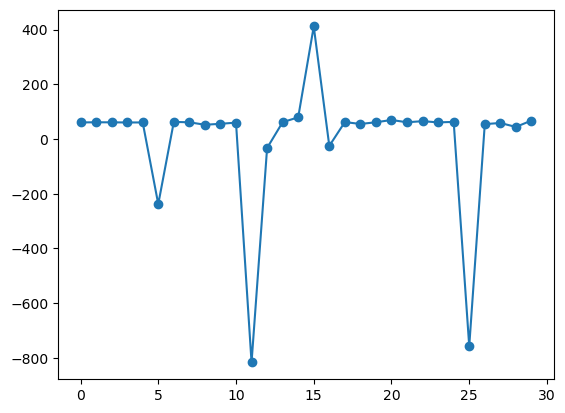

In [246]:
plt.figure()
plt.plot(np.arange(0,30),reg1.fit().resid,'-o')

In [247]:
reg3 = stm.ols('np.log(EXCH)~np.log(PPP)',data = datos)
print(reg3.fit().summary())

                            OLS Regression Results                            
Dep. Variable:           np.log(EXCH)   R-squared:                       0.983
Model:                            OLS   Adj. R-squared:                  0.983
Method:                 Least Squares   F-statistic:                     1655.
Date:                Wed, 13 Dec 2023   Prob (F-statistic):           1.87e-26
Time:                        00:39:40   Log-Likelihood:                -7.4056
No. Observations:                  30   AIC:                             18.81
Df Residuals:                      28   BIC:                             21.61
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept       0.3436      0.086      3.990      

La PPA sostiene que con una unidad de moneda debe ser posible comprar la misma canasta de bienes en todos los países.

### Práctica: Sueño

In [248]:
uu = "https://raw.githubusercontent.com/vmoprojs/DataLectures/master/WO/sleep75.csv"

datos = pd.read_csv(uu,sep = ",",header=None)
datos.columns
datos.columns = ["age","black","case","clerical","construc","educ","earns74","gdhlth","inlf", "leis1", "leis2", "leis3", "smsa", "lhrwage", "lothinc", "male", "marr", "prot", "rlxall", "selfe", "sleep", "slpnaps", "south", "spsepay", "spwrk75", "totwrk" , "union" , "worknrm" , "workscnd", "exper" , "yngkid","yrsmarr", "hrwage", "agesq"]

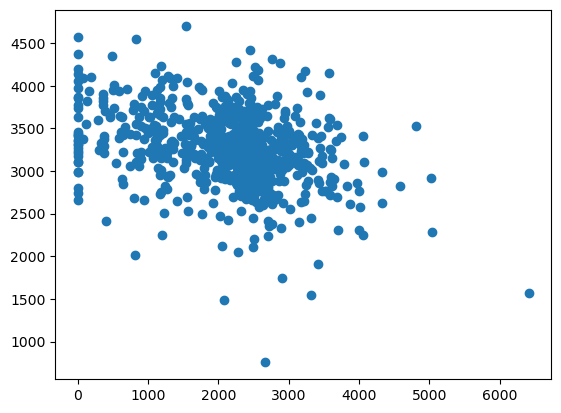

In [249]:
#totwrk: minutos trabajados por semana
# sleep: minutos dormidos por semana
plt.figure()
plt.scatter(datos['totwrk'],datos['sleep'])

In [250]:
dormir = stm.ols('sleep~totwrk',data = datos)
print(dormir.fit().summary())

                            OLS Regression Results                            
Dep. Variable:                  sleep   R-squared:                       0.103
Model:                            OLS   Adj. R-squared:                  0.102
Method:                 Least Squares   F-statistic:                     81.09
Date:                Wed, 13 Dec 2023   Prob (F-statistic):           1.99e-18
Time:                        00:39:41   Log-Likelihood:                -5267.1
No. Observations:                 706   AIC:                         1.054e+04
Df Residuals:                     704   BIC:                         1.055e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   3586.3770     38.912     92.165      0.0

Para acceder a elementos de la estimación

In [251]:
print(dormir.fit().bse)
print(dormir.fit().params)

Intercept    38.912427
totwrk        0.016740
dtype: float64
Intercept    3586.376952
totwrk         -0.150746
dtype: float64


Intervalo de confianza para $\beta_2$ y veamos los residuos

In [252]:
dormir.fit().params[1]+(-2*dormir.fit().bse[1],2*dormir.fit().bse[1])

array([-0.18422633, -0.11726532])

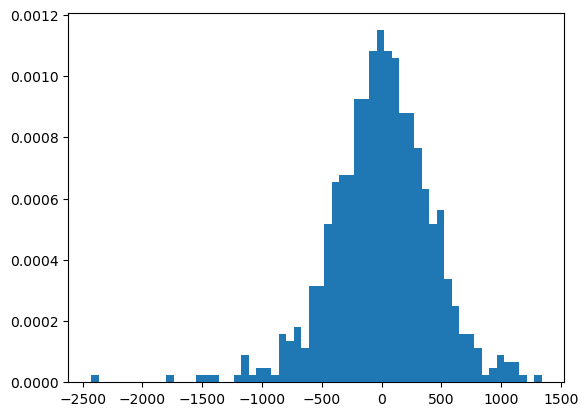

In [253]:
plt.figure()
plt.hist(dormir.fit().resid,bins = 60,density = True);

### Transformaciones lineales

In [254]:
uu = "https://raw.githubusercontent.com/vmoprojs/DataLectures/master/GA/Table%2031_3.csv"

datos = pd.read_csv(uu, sep =';')

reg_1 = stm.ols('Cellphone~Pcapincome',data = datos)
print(reg_1.fit().summary())

                            OLS Regression Results                            
Dep. Variable:              Cellphone   R-squared:                       0.626
Model:                            OLS   Adj. R-squared:                  0.615
Method:                 Least Squares   F-statistic:                     53.67
Date:                Wed, 13 Dec 2023   Prob (F-statistic):           2.50e-08
Time:                        00:39:42   Log-Likelihood:                -148.94
No. Observations:                  34   AIC:                             301.9
Df Residuals:                      32   BIC:                             304.9
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     12.4795      6.109      2.043      0.0

Text(0, 0.5, 'Cellphone')

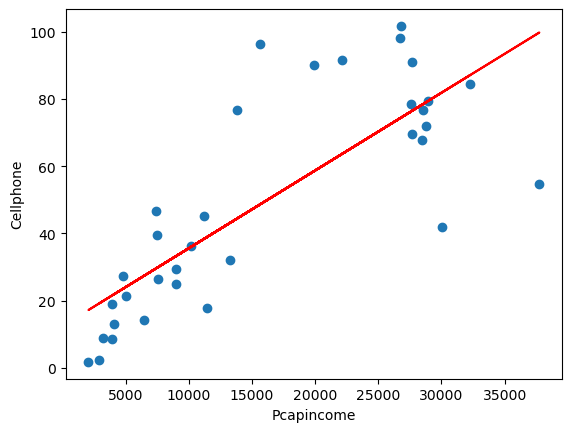

In [255]:
plt.figure()
plt.plot(datos.Pcapincome,datos.Cellphone,'o')
plt.plot(datos.Pcapincome,reg_1.fit().fittedvalues,'-',color='r')
plt.xlabel('Pcapincome')
plt.ylabel('Cellphone')

### Modelo reciproco

In [256]:
uu =  "https://raw.githubusercontent.com/vmoprojs/DataLectures/master/GA/tabla_6_4.csv"
datos = pd.read_csv(uu,sep = ';')
datos.describe()

CM        FLR          PGNP        TFR
count   64.000000  64.000000     64.000000  64.000000
mean   141.500000  51.187500   1401.250000   5.549688
std     75.978067  26.007859   2725.695775   1.508993
min     12.000000   9.000000    120.000000   1.690000
25%     82.000000  29.000000    300.000000   4.607500
50%    138.500000  48.000000    620.000000   6.040000
75%    192.500000  77.250000   1317.500000   6.615000
max    312.000000  95.000000  19830.000000   8.490000

Text(0, 0.5, 'CM')

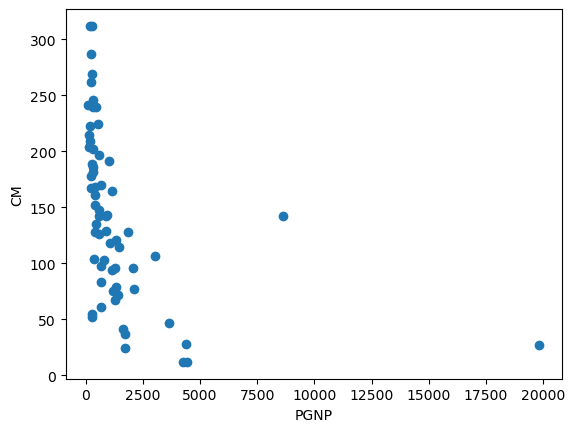

In [257]:
plt.figure()
plt.plot(datos.PGNP,datos.CM,'o')
plt.xlabel('PGNP')
plt.ylabel('CM')

In [258]:
reg1 = stm.ols('CM~PGNP',data = datos)
print(reg1.fit().summary())

                            OLS Regression Results                            
Dep. Variable:                     CM   R-squared:                       0.166
Model:                            OLS   Adj. R-squared:                  0.153
Method:                 Least Squares   F-statistic:                     12.36
Date:                Wed, 13 Dec 2023   Prob (F-statistic):           0.000826
Time:                        00:39:42   Log-Likelihood:                -361.64
No. Observations:                  64   AIC:                             727.3
Df Residuals:                      62   BIC:                             731.6
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    157.4244      9.846     15.989      0.0

In [259]:
datos['RepPGNP'] = 1/datos.PGNP

reg2 = stm.ols('CM~RepPGNP',data = datos)
print(reg2.fit().summary())

                            OLS Regression Results                            
Dep. Variable:                     CM   R-squared:                       0.459
Model:                            OLS   Adj. R-squared:                  0.450
Method:                 Least Squares   F-statistic:                     52.61
Date:                Wed, 13 Dec 2023   Prob (F-statistic):           7.82e-10
Time:                        00:39:42   Log-Likelihood:                -347.79
No. Observations:                  64   AIC:                             699.6
Df Residuals:                      62   BIC:                             703.9
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     81.7944     10.832      7.551      0.0

### Modelo log-lineal

In [260]:
uu = "https://raw.githubusercontent.com/vmoprojs/DataLectures/master/WO/ceosal2.csv"

datos = pd.read_csv(uu,header = None)
datos.columns = ["salary", "age", "college", "grad", "comten", "ceoten", "sales", "profits","mktval", "lsalary", "lsales", "lmktval", "comtensq", "ceotensq", "profmarg"]
datos.head()


reg1 = stm.ols('lsalary~ceoten',data = datos)
print(reg1.fit().summary())

                            OLS Regression Results                            
Dep. Variable:                lsalary   R-squared:                       0.013
Model:                            OLS   Adj. R-squared:                  0.008
Method:                 Least Squares   F-statistic:                     2.334
Date:                Wed, 13 Dec 2023   Prob (F-statistic):              0.128
Time:                        00:39:43   Log-Likelihood:                -160.84
No. Observations:                 177   AIC:                             325.7
Df Residuals:                     175   BIC:                             332.0
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      6.5055      0.068     95.682      0.0

### Regresión a través del origen

In [261]:
uu = "https://raw.githubusercontent.com/vmoprojs/DataLectures/master/GA/Table%206_1.csv"
datos = pd.read_csv(uu,sep = ';')
datos.head()


lmod1 = stm.ols('Y~ -1+X',data = datos)
print(lmod1.fit().summary())

                                 OLS Regression Results                                
Dep. Variable:                      Y   R-squared (uncentered):                   0.502
Model:                            OLS   Adj. R-squared (uncentered):              0.500
Method:                 Least Squares   F-statistic:                              241.2
Date:                Wed, 13 Dec 2023   Prob (F-statistic):                    4.41e-38
Time:                        00:39:43   Log-Likelihood:                         -751.30
No. Observations:                 240   AIC:                                      1505.
Df Residuals:                     239   BIC:                                      1508.
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
                 coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------

## Regresión Lineal Múltiple

In [262]:
uu =  "https://raw.githubusercontent.com/vmoprojs/DataLectures/master/WO/hprice1.csv"
datos = pd.read_csv(uu,header=None)
datos.columns = ["price"   ,  "assess"  , 
                 "bdrms"  ,   "lotsize"  ,
                 "sqrft"   ,  "colonial",
                 "lprice"  ,  "lassess" ,
                 "llotsize" , "lsqrft"]

datos.describe()


price      assess      bdrms       lotsize        sqrft  \
count   88.000000   88.000000  88.000000     88.000000    88.000000   
mean   293.546034  315.736364   3.568182   9019.863636  2013.693182   
std    102.713445   95.314437   0.841393  10174.150414   577.191583   
min    111.000000  198.700000   2.000000   1000.000000  1171.000000   
25%    230.000000  253.900000   3.000000   5732.750000  1660.500000   
50%    265.500000  290.200000   3.000000   6430.000000  1845.000000   
75%    326.250000  352.125000   4.000000   8583.250000  2227.000000   
max    725.000000  708.600000   7.000000  92681.000000  3880.000000   

        colonial     lprice    lassess   llotsize     lsqrft  
count  88.000000  88.000000  88.000000  88.000000  88.000000  
mean    0.693182   5.633180   5.717994   8.905105   7.572610  
std     0.463816   0.303573   0.262113   0.544060   0.258688  
min     0.000000   4.709530   5.291796   6.907755   7.065613  
25%     0.000000   5.438079   5.536940   8.653908   7.414873  
50%     1.000000   5.581613   5.670566   8.768719   7.520231  
75%     1.000000   5.787642   5.863982   9.057567   7.708266  
max     1.000000   6.586172   6.563291  11.436920   8.263591

In [263]:

modelo1 = stm.ols('lprice~lassess+llotsize+lsqrft+bdrms',data = datos)
print(modelo1.fit().summary())

                            OLS Regression Results                            
Dep. Variable:                 lprice   R-squared:                       0.773
Model:                            OLS   Adj. R-squared:                  0.762
Method:                 Least Squares   F-statistic:                     70.58
Date:                Wed, 13 Dec 2023   Prob (F-statistic):           6.45e-26
Time:                        00:39:44   Log-Likelihood:                 45.750
No. Observations:                  88   AIC:                            -81.50
Df Residuals:                      83   BIC:                            -69.11
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.2637      0.570      0.463      0.6

In [264]:
modelo2 = stm.ols('lprice~llotsize+lsqrft+bdrms',data = datos)
print(modelo2.fit().summary())

                            OLS Regression Results                            
Dep. Variable:                 lprice   R-squared:                       0.643
Model:                            OLS   Adj. R-squared:                  0.630
Method:                 Least Squares   F-statistic:                     50.42
Date:                Wed, 13 Dec 2023   Prob (F-statistic):           9.74e-19
Time:                        00:39:44   Log-Likelihood:                 25.861
No. Observations:                  88   AIC:                            -43.72
Df Residuals:                      84   BIC:                            -33.81
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -1.2970      0.651     -1.992      0.0

In [265]:
modelo3 = stm.ols('lprice~bdrms',data = datos)
print(modelo3.fit().summary())

                            OLS Regression Results                            
Dep. Variable:                 lprice   R-squared:                       0.215
Model:                            OLS   Adj. R-squared:                  0.206
Method:                 Least Squares   F-statistic:                     23.53
Date:                Wed, 13 Dec 2023   Prob (F-statistic):           5.43e-06
Time:                        00:39:44   Log-Likelihood:                -8.8147
No. Observations:                  88   AIC:                             21.63
Df Residuals:                      86   BIC:                             26.58
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      5.0365      0.126     39.862      0.0

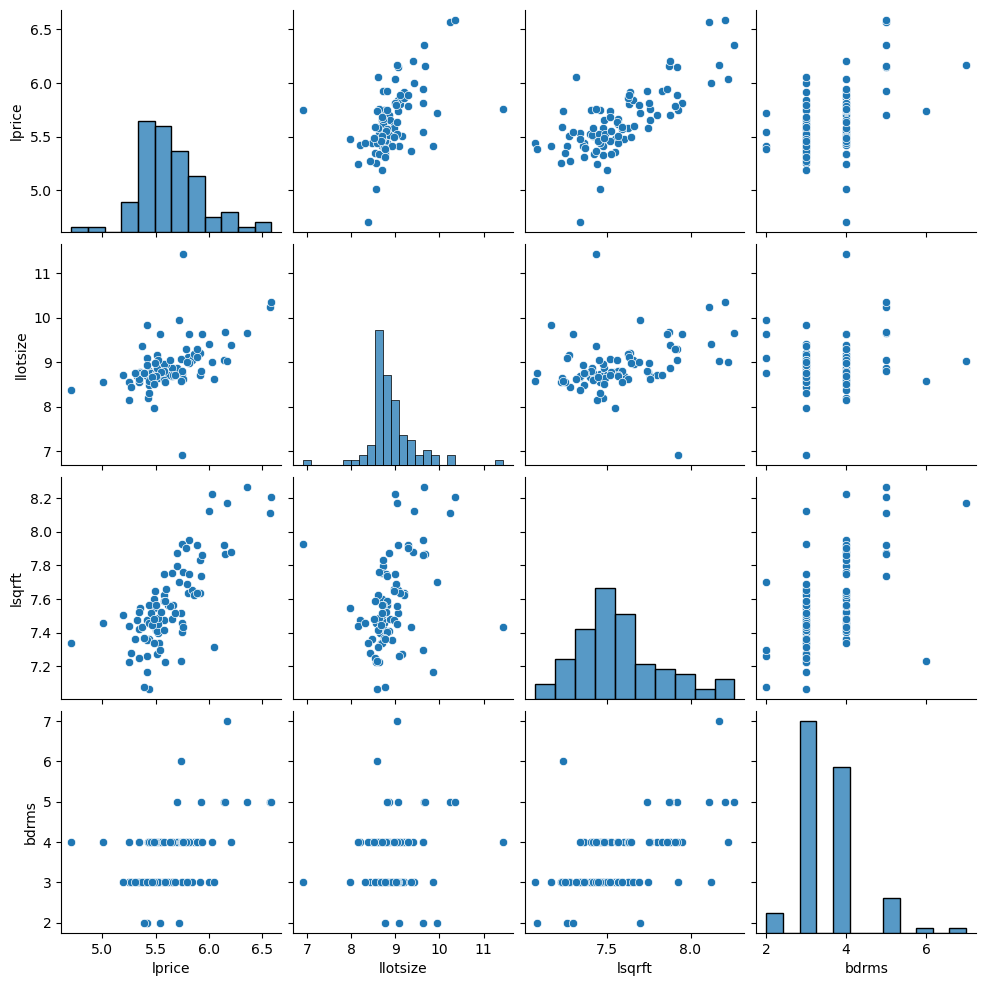

In [266]:
import seaborn as sns

sns.pairplot(datos.loc[:,['lprice','llotsize' , 'lsqrft' , 'bdrms']])

### Predicción

In [267]:
datos_nuevos = pd.DataFrame({'llotsize':np.log(2100),'lsqrft':np.log(8000),'bdrms':4},index = [0])

pred_vals = modelo2.fit().predict()
modelo2.fit().get_prediction().summary_frame().head()

mean   mean_se  mean_ci_lower  mean_ci_upper  obs_ci_lower  \
0  5.776577  0.029185       5.718541       5.834614      5.404916   
1  5.707740  0.029306       5.649463       5.766018      5.336041   
2  5.310543  0.033384       5.244156       5.376930      4.937486   
3  5.326681  0.031818       5.263407       5.389955      4.954165   
4  5.797220  0.031014       5.735544       5.858895      5.424972   

   obs_ci_upper  
0      6.148239  
1      6.079440  
2      5.683600  
3      5.699197  
4      6.169467

In [268]:
pred_vals = modelo2.fit().get_prediction(datos_nuevos)
pred_vals.summary_frame()

mean   mean_se  mean_ci_lower  mean_ci_upper  obs_ci_lower  \
0  6.428811  0.147975       6.134546       6.723076      5.958326   

   obs_ci_upper  
0      6.899296

### RLM: Cobb-Douglas

El modelo:

$$
Y_i = \beta_1X_{2i}^{\beta_2}X_{3i}^{\beta_3}e^{u_i}
$$

donde 

-   $Y$: producción
-   $X_2$: insumo trabajo
-   $X_3$: insumo capital
-   $u$: término de perturbación
-   $e$: base del logaritmo


Notemos que el modelo es multiplicativo, si tomamos la derivada obetenemos un modelo más famliar respecto a la regresión lineal múltiple:

$$
lnY_i = ln\beta_1 + \beta_2ln(X_{2i})+ \beta_3ln(X_{3i}) + u_i
$$


La interpretación de los coeficientes es {cite}`@gujarati2010econometria`:

1. $\beta_2$ es la elasticidad (parcial) de la producción respecto del insumo trabajo, es decir, mide el cambio porcentual en la producción debido a una variación de 1% en el insumo trabajo, con el insumo capital constante.

2. De igual forma, $\beta_3$ es la elasticidad (parcial) de la producción respecto del insumo capital, con el insumo trabajo constante.

3. La suma ($\beta_2+\beta_3$) da información sobre los rendimientos a escala, es decir, la respuesta de la producción a un cambio proporcional en los insumos. Si esta suma es 1, existen rendimientos constantes a escala, es decir, la duplicación de los insumos duplica la producción, la triplicación de los insumos la triplica, y así sucesivamente. Si la suma es menor que 1, existen rendimientos decrecientes a escala: al duplicar los insumos, la producción crece en menos del doble. Por
último, si la suma es mayor que 1, hay rendimientos crecientes a escala; la duplicación de los insumos aumenta la producción en más del doble.


Abrir la `tabla 7.3`. Regresar las horas de trabajo ($X_2$)  e Inversión de Capital ($X_3$) en el Valor Agregado ($Y$)

In [270]:
uu = "https://raw.githubusercontent.com/vmoprojs/DataLectures/master/GA/tabla7_3.csv"
datos =  pd.read_csv(uu,sep=";")

In [271]:
datos.describe()

Year             Y          X2            X3
count    15.000000     15.000000   15.000000     15.000000
mean   1965.000000  24735.333333  287.346667  25505.966667
std       4.472136   4874.173486   14.806556   7334.889966
min    1958.000000  16607.700000  267.000000  17803.700000
25%    1961.500000  20618.800000  274.700000  19407.450000
50%    1965.000000  26465.800000  288.100000  23445.200000
75%    1968.500000  28832.100000  299.850000  30766.850000
max    1972.000000  31535.800000  307.500000  41794.300000

In [272]:
W = np.log(datos.X2)

K = np.log(datos.X3)

LY = np.log(datos.Y)

reg_1 = stm.ols("LY~W+K",data = datos).fit()

In [273]:
print(reg_1.summary())
import statsmodels.api as sm
sm.stats.anova_lm(reg_1, typ=2)

                            OLS Regression Results                            
Dep. Variable:                     LY   R-squared:                       0.889
Model:                            OLS   Adj. R-squared:                  0.871
Method:                 Least Squares   F-statistic:                     48.08
Date:                Wed, 13 Dec 2023   Prob (F-statistic):           1.86e-06
Time:                        00:39:50   Log-Likelihood:                 19.284
No. Observations:                  15   AIC:                            -32.57
Df Residuals:                      12   BIC:                            -30.44
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -3.3387      2.449     -1.363      0.1

/Users/victormorales/opt/anaconda3/lib/python3.9/site-packages/scipy/stats/_stats_py.py:1736: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=15
  warnings.warn("kurtosistest only valid for n>=20 ... continuing "


sum_sq    df          F    PR(>F)
W         0.043141   1.0   7.710533  0.016750
K         0.128988   1.0  23.053747  0.000432
Residual  0.067141  12.0        NaN       NaN

- Las elasticidades de la producción respecto del trabajo y el capital fueron 1.49 y 0.48 respectivamente.


Ahora, si existen rendimientos constantes a escala (un cambio equi-proporcional en la producción ante un cambio equi-proporcional en los insumos), la teoría económica sugeriría que: 

$$
\beta_2 +\beta_3 = 1
$$

In [274]:
LY_K = np.log(datos.Y/datos.X3)
W_K = np.log(datos.X2/datos.X3)


reg_2 = stm.ols("LY_K~W_K",data = datos).fit()
print(reg_2.summary())
sm.stats.anova_lm(reg_2)

                            OLS Regression Results                            
Dep. Variable:                   LY_K   R-squared:                       0.570
Model:                            OLS   Adj. R-squared:                  0.536
Method:                 Least Squares   F-statistic:                     17.20
Date:                Wed, 13 Dec 2023   Prob (F-statistic):            0.00115
Time:                        00:39:50   Log-Likelihood:                 16.965
No. Observations:                  15   AIC:                            -29.93
Df Residuals:                      13   BIC:                            -28.51
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      1.7083      0.416      4.108      0.0

/Users/victormorales/opt/anaconda3/lib/python3.9/site-packages/scipy/stats/_stats_py.py:1736: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=15
  warnings.warn("kurtosistest only valid for n>=20 ... continuing "


df    sum_sq   mean_sq         F    PR(>F)
W_K        1.0  0.121005  0.121005  17.19981  0.001147
Residual  13.0  0.091459  0.007035       NaN       NaN

**¿Se cumple la hipótesis nula? ¿Existen rendimientos constantes de escala?**

Una forma de responder a la pregunta es mediante la prueba $t$, para $Ho: \beta_2 +\beta_3 = 1$, tenemos

$$
t = \frac{(\hat{\beta}_2+\hat{\beta}_3)-(\beta_2+\beta_3)}{ee(\hat{\beta}_2+\hat{\beta}_3)}
$$
$$
t = \frac{(\hat{\beta}_2+\hat{\beta}_3)-1}{\sqrt{var(\hat{\beta}_2)+var(\hat{\beta}_3)+2cov(\hat{\beta}_2,\hat{\beta}_3})}
$$
donde la información nececesaria para obtener $cov(\hat{\beta}_2,\hat{\beta}_3)$ en `Python` la librería `statsmodels.api` es `model.cov_params()` y `model` es el ajuste del modelo.

Otra forma de hacer la prueba es mediante el estadístico $F$:

$$
F = \frac{(SCE_{R}-SCE_{NR})/m}{SCR_{NR}/(n-k)}
$$

donde $m$ es el número de restricciones lineales y $k$ es el número de parámetros de la regresión no restringida.

In [275]:
SCRNR = 0.0671410  
SCRRes = 0.09145854 
numero_rest = 1
grad = 12

est_F = ((SCRRes-SCRNR)/numero_rest)/(SCRNR/grad)
est_F

from scipy import stats
mif = stats.f.cdf(est_F,dfn=1, dfd=12)
valorp = 1-mif
print(["Estadistico F: "] +[est_F])
print(["Valor p: "] +[valorp])
#cov_matrix = reg_1.cov_params()
#print(cov_matrix)

['Estadistico F: ', 4.346233746890871]
['Valor p: ', 0.059121842231030675]


No se tiene suficiente evidencia para rechazar la hipótesis nula de que sea una economía de escala.


Notemos que existe una relación directa entre el coeficiente de determinación o bondad de ajuste $R^2$ y $F$. En primero lugar, recordemos la descomposición de los errores:

$$
SCT = SCE + SCR
$$

$$
\sum_{i=1}^{n}(Y-\bar{Y})^2 = \sum_{i=1}^{n}(\hat{Y}-\bar{Y})^2 + \sum_{i=1}^{n}(\hat{u})^2
$$

De cuyos elementos podemos obtener tanto $R^2$ como $F$:

$$
R^2 = \frac{SCE}{SCT}
$$

$$
F = \frac{SCE/(k-1)}{SCT/(n-k)}
$$

donde $k$ es el número de variables (incluido el intercepto) y sigue una distribución $F$ con $k-1$ y $n-k$ grados de libertad.


### RLM: Dicotómicas


Abrir los datos `wage1` Correr los modelos. Se desea saber si el género tiene relación con el salario y en qué medida.

In [276]:
uu = "https://raw.githubusercontent.com/vmoprojs/DataLectures/master/WO/wage1.csv"
salarios = pd.read_csv(uu, header = None) 

salarios.columns =  ["wage", "educ", "exper", "tenure", "nonwhite", "female", "married",
                     "numdep", "smsa", "northcen", "south", "west", "construc", "ndurman",
                     "trcommpu", "trade", "services",  "profserv", "profocc", "clerocc",
                     "servocc", "lwage", "expersq", "tenursq"]

In [277]:
reg3 = stm.ols("wage~female",data = salarios).fit()
print(reg3.summary())

reg4 = stm.ols("wage~female + educ+ exper + tenure",data = salarios).fit()
print(reg4.summary())

                            OLS Regression Results                            
Dep. Variable:                   wage   R-squared:                       0.116
Model:                            OLS   Adj. R-squared:                  0.114
Method:                 Least Squares   F-statistic:                     68.54
Date:                Wed, 13 Dec 2023   Prob (F-statistic):           1.04e-15
Time:                        00:39:50   Log-Likelihood:                -1400.7
No. Observations:                 526   AIC:                             2805.
Df Residuals:                     524   BIC:                             2814.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      7.0995      0.210     33.806      0.0

- La hipótesis es saber si el coeficiente de *female* es menor a cero.
- Se nota que es menor.
- Tomando en cuenta, educacion experiencia y edad, en promedio a la mujer le pagan 1.81 menos

### RLM: Educación con insumos

Abrir los datos `gpa1` Correr los modelos.

- ¿Afecta el promedio de calificaciones el tener o no una computadora?

In [278]:
uu = "https://raw.githubusercontent.com/vmoprojs/DataLectures/master/WO/gpa1.csv"
datosgpa = pd.read_csv(uu, header = None)
datosgpa.columns = ["age",  "soph",  "junior",    "senior",    "senior5",  "male", "campus",   "business", "engineer", "colGPA",   "hsGPA",    "ACT",  "job19",    "job20",    "drive",    "bike", "walk", "voluntr",  "PC",   "greek",    "car",  "siblings", "bgfriend", "clubs",    "skipped",  "alcohol",  "gradMI",   "fathcoll", "mothcoll"]

reg4 = stm.ols('colGPA ~ PC', data = datosgpa)
print(reg4.fit().summary())

                            OLS Regression Results                            
Dep. Variable:                 colGPA   R-squared:                       0.050
Model:                            OLS   Adj. R-squared:                  0.043
Method:                 Least Squares   F-statistic:                     7.314
Date:                Wed, 13 Dec 2023   Prob (F-statistic):            0.00770
Time:                        00:39:51   Log-Likelihood:                -56.641
No. Observations:                 141   AIC:                             117.3
Df Residuals:                     139   BIC:                             123.2
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      2.9894      0.040     75.678      0.0

In [279]:
reg5 = stm.ols('colGPA ~ PC + hsGPA + ACT', data = datosgpa)
print(reg5.fit().summary())

                            OLS Regression Results                            
Dep. Variable:                 colGPA   R-squared:                       0.219
Model:                            OLS   Adj. R-squared:                  0.202
Method:                 Least Squares   F-statistic:                     12.83
Date:                Wed, 13 Dec 2023   Prob (F-statistic):           1.93e-07
Time:                        00:39:51   Log-Likelihood:                -42.796
No. Observations:                 141   AIC:                             93.59
Df Residuals:                     137   BIC:                             105.4
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      1.2635      0.333      3.793      0.0

### RLM: Cambio estructural

>Cuando utilizamos un modelo de regresión que implica series de tiempo, tal vez se dé un cambio estructural en la relación entre la regresada Y y las regresoras. Por cambio estructural nos referimos a que los valores de los parámetros del modelo no permanecen constantes a lo largo de todo el periodo {cite}`gujarati2010econometria`

La tasa de desempleo civil alcanzó 9.7%, la más alta desde 1948. Un suceso como éste pudo perturbar la relación entre el ahorro y el IPD. Para ver si lo anterior sucedió, dividamos la muestra en dos periodos: 1970-1981 y 1982-1995, antes y después de la recesión de 1982.


Ahora tenemos tres posibles regresiones:

$$
\text{1970-1981: } Y_t=\lambda_1+\lambda_2X_t+u_{1t}
$$ (chow1)

$$
\text{1982-1995: } Y_t=\gamma_1+\gamma_2X_t+u_{2t}
$$ (chow2)


$$
\text{1970-1995: } Y_t=\alpha_1+\alpha_2X_t+u_{2t}
$$

De los períodos parciales se desprende cuatro posibilidades:

<img src="images/RL_Im5.png" width="600" height="300">

Para evaluar si hay diferencias, podemos utilizar los modelos de regresión con variables dicotómicas:

$$
Y_t = \alpha_1+\alpha_2D_t+\beta_1X_t+\beta_2(D_tX_t)+u_t
$$ (chow3)

donde 


- $Y$: ahorro
- $X$: ingreso
- $t$: tiempo
- $D$: 1 para el período 1982-1995, 0 en otro caso.


La variable dicotómica de la ecuación {eq}`chow3` es quien me permite estimar las ecuaciones {eq}`chow1` y {eq}`chow2` al *mismo tiempo*. Es decir:


Función de ahorros medios para 1970-1981:

$$
E(Y_t|D_t=0,X_t) = \alpha_1+\beta_1X_t
$$

Función de ahorros medios para 1982-1995:

$$
E(Y_t|D_t=1,X_t) = (\alpha_1+\alpha_2)+(\beta_1+\beta_2)X_t
$$

Notemos que se trata de las mismas funciones que en {eq}`chow1` y {eq}`chow2`, con

- $\lambda_1=\alpha_1$
- $\lambda_2=\beta_1$
- $\gamma_1=(\alpha_1+\alpha_2)$
- $\gamma_2=(\beta_1+\beta_2)$


Abrir los `datos 8.9`. Veamos las variables gráficamente:

In [280]:
uu = "https://raw.githubusercontent.com/vmoprojs/DataLectures/master/GA/tabla_8_9.csv"

datos = pd.read_csv(uu,sep=";")
datos.columns

Index(['YEAR', 'SAVINGS', 'INCOME'], dtype='object')

[Text(0.5, 1.0, 'Ahorro VS Ingresos'),
 Text(0.5, 0, 'Ahorros'),
 Text(0, 0.5, 'Ingresos')]

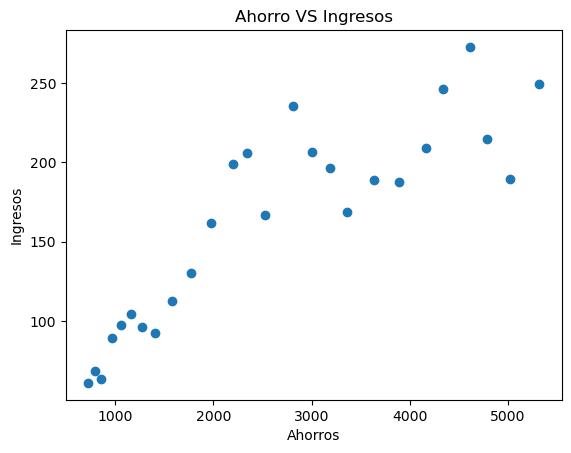

In [281]:
import matplotlib.pyplot as plt
plt.scatter(datos.INCOME,datos.SAVINGS)
plt.gca().update(dict(title='Ahorro VS Ingresos', xlabel='Ahorros', ylabel='Ingresos'))


[Text(0.5, 1.0, 'Ahorro VS Tiempo'),
 Text(0.5, 0, 'Año'),
 Text(0, 0.5, 'Ahorro')]

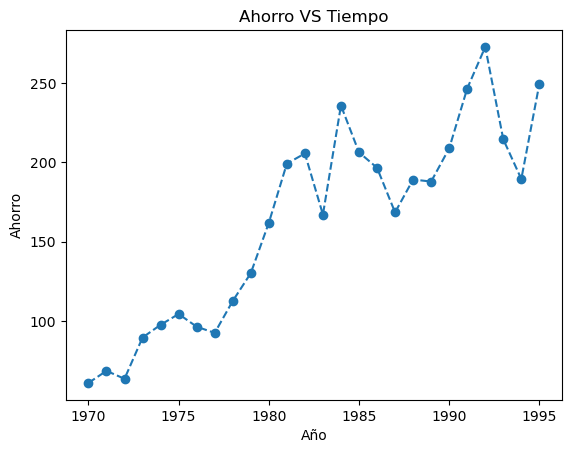

In [282]:
plt.plot(datos.YEAR,datos.SAVINGS,"--o")
plt.gca().update(dict(title='Ahorro VS Tiempo', xlabel='Año', ylabel='Ahorro'))

¿Hubo algún cambio en la relación entre ingreso y ahorro en el 80?

- Hay varias formas de hacer la prueba, la mas fácil es mediante variables dicotómicas

In [283]:
ajuste_chow = stm.ols("SAVINGS~INCOME",data = datos).fit()
print(ajuste_chow.summary())

cambio = (datos.YEAR>1981)*1

ajuste_chow = stm.ols("SAVINGS~INCOME+cambio",data = datos).fit()
print(ajuste_chow.summary())

                            OLS Regression Results                            
Dep. Variable:                SAVINGS   R-squared:                       0.767
Model:                            OLS   Adj. R-squared:                  0.758
Method:                 Least Squares   F-statistic:                     79.10
Date:                Wed, 13 Dec 2023   Prob (F-statistic):           4.61e-09
Time:                        00:39:51   Log-Likelihood:                -125.24
No. Observations:                  26   AIC:                             254.5
Df Residuals:                      24   BIC:                             257.0
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     62.4227     12.761      4.892      0.0

Veamos el modelo en términos de interacciones y la matriz de diseño:

In [284]:
ajuste_chow1 = stm.ols("SAVINGS~INCOME+cambio+INCOME*cambio", data = datos).fit()
print(ajuste_chow1.summary())

                            OLS Regression Results                            
Dep. Variable:                SAVINGS   R-squared:                       0.882
Model:                            OLS   Adj. R-squared:                  0.866
Method:                 Least Squares   F-statistic:                     54.78
Date:                Wed, 13 Dec 2023   Prob (F-statistic):           2.27e-10
Time:                        00:39:51   Log-Likelihood:                -116.41
No. Observations:                  26   AIC:                             240.8
Df Residuals:                      22   BIC:                             245.9
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept         1.0161     20.165      0.050

## RLM: Supuestos

### Multicolinealidad

El problema:

$$
\hat{\beta}=(X'X)^{-1}X'Y
$$
- Se tiene un problema en cuanto a la transpuesta de la matriz $(X'X)$

- Perfecta: Si se tiene este tipo, el modelo simplemente no toma en cuenta esta variable
- Imperfecta: El cáclulo de la inversa es computacionalmente exigente


<img src="images/RL_Im4.png" width="600" height="300">

Posibles causas:

- El método de recolección de información
- Restricciones en el modelo o en la población objeto de muestreo
- Especificación del modelo	
- Un modelo sobredetermindado
- Series de tiempo

¿Cuál es la naturaleza de la multicolinealidad?

**Causas**
- ¿Cuáles son sus consecuencias prácticas?

**Incidencia en los errores estándar y sensibilidad**

- ¿Cómo se detecta?

**Pruebas**

¿Qué medidas pueden tomarse para aliviar el problema de multicolinealidad?

- No hacer nada
- Eliminar variables
- Transformación de variables
- Añadir datos a la muestra
- Componentes principales, factores, entre otros


¿Cómo se detecta?

- Un $R^{2}$ elevado pero con pocas razones $t$ significativas
- Regresiones auxiliares (Pruebas de Klein)
- Factor de inflación de la varianza
$$
VIF = \frac{1}{(1-R^2)}
$$


**Ejemplo 1**

- Haremos uso del paquete AER
- Abrir la tabla 10.8
- Ajusta el modelo

donde 

- $X_1$ índice implícito de deflación de precios para el PIB, 
- $X_2$ es el PIB (en millones de dólares), 
- $X_3$ número de desempleados (en miles), 
- $X_4$ número de personas enlistadas en las fuerzas armadas, 
- $X_5$ población no institucionalizada mayor de 14 años de edad
- $X_6$ año (igual a 1 para 1947, 2 para 1948 y 16 para 1962).

$$
Y_{i} = \beta_{0}+\beta_{1}X_{1}+\beta_{2}X_{2}+\beta_{3}X_{3} + \beta_{4}X_{4}+\beta_{5}X_{5}+u_{i}\nonumber
$$

- Analice los resultados

In [285]:
uu = "https://raw.githubusercontent.com/vmoprojs/DataLectures/master/GA/tabla10_8.csv"
datos =  pd.read_csv(uu,sep = ";")
datos.describe()

obs             Y           X1             X2           X3  \
count    15.000000     15.000000    15.000000      15.000000    15.000000   
mean   1954.000000  64968.066667  1006.666667  376552.066667  3139.066667   
std       4.472136   3335.820235   103.503393   91951.976996   940.825053   
min    1947.000000  60171.000000   830.000000  234289.000000  1870.000000   
25%    1950.500000  62204.000000   928.500000  306787.000000  2340.500000   
50%    1954.000000  64989.000000  1000.000000  365385.000000  2936.000000   
75%    1957.500000  68013.000000  1096.000000  443657.500000  3747.500000   
max    1961.000000  69564.000000  1157.000000  518173.000000  4806.000000   

                X4             X5       TIME  
count    15.000000      15.000000  15.000000  
mean   2592.000000  116580.200000   8.000000  
std     717.773741    6295.863769   4.472136  
min    1456.000000  107608.000000   1.000000  
25%    2082.000000  111502.000000   4.500000  
50%    2637.000000  116219.000000   8.000000  
75%    3073.500000  121197.500000  11.500000  
max    3594.000000  127852.000000  15.000000

Agreguemos el tiempo:
 - Las correlaciones muy altas también suelen ser síntoma de multicolinealidad


In [286]:
ajuste2 = stm.ols("Y~X1+X2+X3+X4+X5+TIME",data = datos).fit()
print(ajuste2.summary())

                            OLS Regression Results                            
Dep. Variable:                      Y   R-squared:                       0.996
Model:                            OLS   Adj. R-squared:                  0.992
Method:                 Least Squares   F-statistic:                     295.8
Date:                Wed, 13 Dec 2023   Prob (F-statistic):           6.04e-09
Time:                        00:39:52   Log-Likelihood:                -101.91
No. Observations:                  15   AIC:                             217.8
Df Residuals:                       8   BIC:                             222.8
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   6.727e+04   2.32e+04      2.895      0.0

/Users/victormorales/opt/anaconda3/lib/python3.9/site-packages/scipy/stats/_stats_py.py:1736: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=15
  warnings.warn("kurtosistest only valid for n>=20 ... continuing "


In [287]:
X = datos[['X1','X2','X3','X4','X5','TIME']]
np.corrcoef(X)

array([[1.        , 0.99924002, 0.99943568, 0.99769462, 0.99320207,
        0.99142138, 0.98987707, 0.99050446, 0.98686967, 0.98485669,
        0.98283221, 0.98314407, 0.97959391, 0.97833135, 0.97770034],
       [0.99924002, 1.        , 0.9999722 , 0.99957845, 0.99697832,
        0.99575407, 0.99464953, 0.99510499, 0.99241202, 0.99086331,
        0.98927457, 0.98951979, 0.98668154, 0.98565615, 0.98514016],
       [0.99943568, 0.9999722 , 1.        , 0.99940088, 0.99649819,
        0.99518861, 0.99401913, 0.99452176, 0.99168255, 0.99006487,
        0.98841306, 0.9886863 , 0.98573357, 0.98467382, 0.98414795],
       [0.99769462, 0.99957845, 0.99940088, 1.        , 0.99878987,
        0.99797718, 0.99719881, 0.99754083, 0.99554183, 0.99433745,
        0.99307333, 0.99328088, 0.99096573, 0.99011719, 0.9896916 ],
       [0.99320207, 0.99697832, 0.99649819, 0.99878987, 1.        ,
        0.99989587, 0.99966866, 0.99976654, 0.99895641, 0.99833471,
        0.99761743, 0.99771787, 0.99631115, 

- Prueba de Klein: Se basa en realizar regresiones auxiliares de *todas contra todas* las variables regresoras.
- Si el $R^{2}$ de la regresión aux es mayor que la global, esa variable regresora podría ser la que genera multicolinealidad
- ¿Cuántas regresiones auxiliares se tiene en un modelo en general?


Regresemos una de las variables

In [288]:
ajuste3 = stm.ols("X1~X2+X3+X4+X5+TIME",data = datos).fit()
print(ajuste3.summary())

tolerancia = 1-ajuste3.rsquared
print(tolerancia)

                            OLS Regression Results                            
Dep. Variable:                     X1   R-squared:                       0.992
Model:                            OLS   Adj. R-squared:                  0.988
Method:                 Least Squares   F-statistic:                     232.5
Date:                Wed, 13 Dec 2023   Prob (F-statistic):           3.13e-09
Time:                        00:39:52   Log-Likelihood:                -53.843
No. Observations:                  15   AIC:                             119.7
Df Residuals:                       9   BIC:                             123.9
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   1529.0038    728.794      2.098      0.0

/Users/victormorales/opt/anaconda3/lib/python3.9/site-packages/scipy/stats/_stats_py.py:1736: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=15
  warnings.warn("kurtosistest only valid for n>=20 ... continuing "


**Factor de inflación de la varianza**

Si este valor es mucho mayor que 10 y se podría concluir que si hay multicolinealidad

In [289]:
vif = 1/tolerancia
vif


130.18906136858521

Ahora vamos a usar el paquete `statsmodels.stats.outliers_influence`, la función `variance_inflation_factor`:

In [290]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
# Para cada covariable, se calcla VIF y se almacena en un dataframe
X = datos[['X1','X2','X3','X4','X5','TIME']]
X = sm.add_constant(X)
vif = pd.DataFrame()

vif["VIF Factor"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif["Features"] = X.columns
vif.round(1)

VIF Factor Features
0     92681.7    const
1       130.2       X1
2      1490.7       X2
3        32.2       X3
4         3.9       X4
5       347.6       X5
6       746.5     TIME

In [291]:
Raux = (vif[["VIF Factor"]]-1)/vif[["VIF Factor"]]
Rglobal = ajuste2.rsquared
Raux
print(Rglobal-Raux)

   VIF Factor
0   -0.004477
1    0.003193
2   -0.003817
3    0.026546
4    0.254661
5   -0.001611
6   -0.003148


Se podría no hacer nada ante este problema. O se puede tratar con transformaciones. Deflactamos el PIB: `PIB_REAL = X2/X1`

In [292]:
datos['PIB_REAL'] = datos.X2/datos.X1
ajuste4 = stm.ols("Y~PIB_REAL+X3+X4",data = datos).fit()
print(ajuste4.summary())

X = datos[['PIB_REAL','X3','X4']]
X = sm.add_constant(X)
vif = pd.DataFrame()

vif["VIF Factor"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif["Features"] = X.columns
vif.round(1)

                            OLS Regression Results                            
Dep. Variable:                      Y   R-squared:                       0.989
Model:                            OLS   Adj. R-squared:                  0.986
Method:                 Least Squares   F-statistic:                     339.5
Date:                Wed, 13 Dec 2023   Prob (F-statistic):           4.04e-11
Time:                        00:39:52   Log-Likelihood:                -108.41
No. Observations:                  15   AIC:                             224.8
Df Residuals:                      11   BIC:                             227.7
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   4.272e+04    710.121     60.154      0.0

/Users/victormorales/opt/anaconda3/lib/python3.9/site-packages/scipy/stats/_stats_py.py:1736: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=15
  warnings.warn("kurtosistest only valid for n>=20 ... continuing "


VIF Factor  Features
0        50.0     const
1         3.1  PIB_REAL
2         2.3        X3
3         2.3        X4

### Heterocedasticidad

Ocurre cuando la varianza no es constante.

¿Cuál es la naturaleza de la heterocedasticidad?

- Modelos de aprendizaje de los errores: con el paso del tiempo, las personas cometen menos errores de comportamiento. Es decir que la varianza disminuye.
- Ingreso direccional: Es probable que la varianza aumente con el ingreso dado que el aumento del ingreso se tiene más opciones del cómo disponer de él.

<img src="images/RL_5.png" width="600" height="300">

- Técnicas de recolección de datos: si la técnica mejora, es probable que la varianza se reduzca.
- Datos atípicos o aberrantes: Sensibilidad en las estimaciones 
- Especificaciones del modelo: Omisión de variables importantes en el modelo.
- Asimentría: Surge a partir de la distribución de una o más regresoras en el modelo. Ejemplo: Distribución del ingreso *generalmente inequitativo*


#### ¿Cómo detectarla?

Método gráfico

<img src="images/RL_Im6.png" width="600" height="300">

Veamos las pruebas de detección en un ejemplo

- Abrir la base de datos *wage1* de Wooldrigde

In [301]:
uu = "https://raw.githubusercontent.com/vmoprojs/DataLectures/master/WO/wage1.csv"
datos = pd.read_csv(uu,header=None)
datos.columns = ["wage",  "educ",  "exper",  "tenure",    
               "nonwhite","female","married",
               "numdep","smsa","northcen","south",
               "west","construc","ndurman","trcommpu",
               "trade","services","profserv","profocc",
               "clerocc","servocc","lwage","expersq",
               "tenursq"]

In [303]:
datos["casados"] = (1-datos.female)*datos.married  # female 1=mujer  married=1 casado
datos["casadas"] = (datos.female)*datos.married
datos["solteras"] = (datos.female)*(1-datos.married)
datos["solteros"] = (1-datos.female)*(1-datos.married)

- Correr el modelo
$$
lwage = \beta_{0}+\beta_{1}casados+\beta_{2}casadas+\beta_{3}solteras +\beta_{4}educ+\beta_{5}exper+\beta_{6}expersq +\beta_{7}tenure+\beta_{8}tenuresq+u_{i}
$$

- Hacer un gráfico de los valores  estimados y los residuos al cuadrado

#### Prueba de Breusch Pagan

- Correr un modelo de los residuos al cuadrado regresado en las variables explicativas del modelo global.

$$
sqresid = \beta_{0}+\beta_{1}casados+\beta_{2}casadas+\beta_{3}solteras +\beta_{4}educ+\beta_{5}exper+\beta_{6}expersq +\beta_{7}tenure+\beta_{8}tenuresq+u_{i}
$$

- `het_breuschpagan`: si el pvalor es inferior a $0.05$, `Ho: Homocedasticidad`


El códgio en `Python` sería:

                            OLS Regression Results                            
Dep. Variable:                  lwage   R-squared:                       0.461
Model:                            OLS   Adj. R-squared:                  0.453
Method:                 Least Squares   F-statistic:                     55.25
Date:                Wed, 13 Dec 2023   Prob (F-statistic):           1.28e-64
Time:                        00:59:26   Log-Likelihood:                -250.96
No. Observations:                 526   AIC:                             519.9
Df Residuals:                     517   BIC:                             558.3
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.3214      0.100      3.213      0.0

[Text(0.5, 1.0, ''), Text(0.5, 0, 'y techo'), Text(0, 0.5, 'Residuos')]

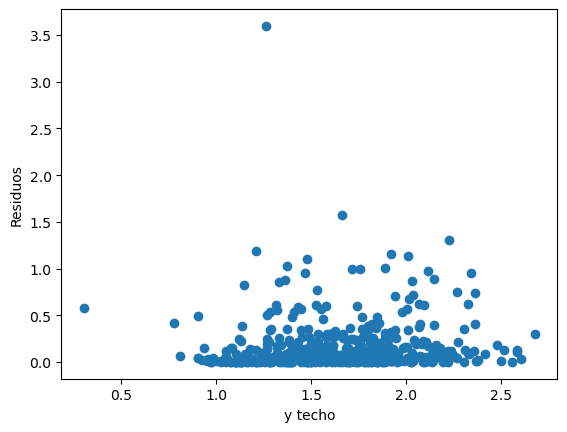

In [316]:
ajuste1 = stm.ols("lwage~casados+casadas+solteras+educ+exper+expersq+tenure+tenursq",data = datos)

print(ajuste1.fit().summary())
residuos = ajuste1.fit().resid
sqresid = residuos**2
y_techo = ajuste1.fit().fittedvalues
#https://www.statsmodels.org/stable/generated/statsmodels.regression.linear_model.RegressionResults.html#statsmodels.regression.linear_model.RegressionResults
plt.scatter(y_techo,sqresid) 
plt.gca().update(dict(title='', xlabel='y techo', ylabel='Residuos'))

In [320]:
# Test para ver si hay heterocedasticidad
ajuste2 = stm.ols("sqresid~casados+casadas+solteras+educ+exper+expersq+tenure+tenursq",data = datos)
print(ajuste2.fit().summary())

                            OLS Regression Results                            
Dep. Variable:                sqresid   R-squared:                       0.025
Model:                            OLS   Adj. R-squared:                  0.010
Method:                 Least Squares   F-statistic:                     1.662
Date:                Wed, 13 Dec 2023   Prob (F-statistic):              0.105
Time:                        01:01:18   Log-Likelihood:                -55.216
No. Observations:                 526   AIC:                             128.4
Df Residuals:                     517   BIC:                             166.8
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.0503      0.069      0.729      0.4

In [324]:
print(ajuste2.fit().fvalue)# Estaditistico F
print(ajuste2.fit().f_pvalue)# ovalor de F

1.66213192035643
0.1049935552326956


In [326]:
import statsmodels.stats.api as sms
from statsmodels.compat import lzip
nombres = ['Lagrange multiplier statistic', 'p-value',
         'f-value', 'f p-value']

resultado = sms.het_breuschpagan(ajuste1.fit().resid,ajuste1.fit().model.exog)
lzip(nombres, resultado)

[('Lagrange multiplier statistic', 13.189307860806634),
 ('p-value', 0.10549999125863747),
 ('f-value', 1.66213192035643),
 ('f p-value', 0.1049935552326956)]

Para estimar errores robustos (como `robust` en stata):

In [327]:
ajuste1.fit().HC0_se

Intercept    0.108528
casados      0.056651
casadas      0.058265
solteras     0.056626
educ         0.007351
exper        0.005095
expersq      0.000105
tenure       0.006881
tenursq      0.000242
dtype: float64